In [1]:
from deliverables.efficientnet import get_eb_model

model = get_eb_model(None, 11,)
model.to('cuda')

ModuleNotFoundError: No module named 'utils'

In [4]:
import torch
torch.save(model, "deliverables/model-3.pth")

In [2]:
import torch
model = torch.load("deliverables/models/nir-test-6.pth")
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [4]:
import cv2
img = cv2.imread("test.jpg")

import numpy as np


img = np.moveaxis(img, -1, 0)
img = torch.from_numpy(img).to("cuda")
img = img.float()  # uint8 to fp16/32
img /= 255.0

if img.ndimension() == 3:
    img = img.unsqueeze(0)

NameError: name 'torch' is not defined

In [6]:
model(img)

[{'boxes': tensor([[8.3252e+02, 5.3950e+02, 1.1465e+03, 7.7466e+02],
          [1.3335e+03, 5.8527e+02, 1.4647e+03, 6.5516e+02],
          [4.1091e+01, 5.9313e+02, 1.5024e+02, 6.4805e+02],
          [1.4683e+03, 5.9584e+02, 1.5181e+03, 6.5600e+02],
          [3.0544e+02, 6.3223e+02, 3.5957e+02, 6.5788e+02],
          [7.9286e+02, 5.8415e+02, 8.7448e+02, 6.5333e+02],
          [1.5092e+03, 5.8152e+02, 1.8730e+03, 6.5705e+02],
          [1.4719e+00, 5.6429e+02, 4.7247e+01, 6.6469e+02],
          [3.7580e+02, 6.0743e+02, 5.9996e+02, 6.4948e+02]], device='cuda:0',
         grad_fn=<StackBackward0>),
  'labels': tensor([3, 3, 3, 3, 3, 3, 3, 3, 3], device='cuda:0'),
  'scores': tensor([1.0000, 1.0000, 0.9999, 0.9998, 0.9998, 0.9998, 0.9998, 0.9998, 0.9990],
         device='cuda:0', grad_fn=<IndexBackward0>)}]

In [1]:
from deliverables.frcnn_detector import iClass
model = iClass()
model.initialize("deliverables/models/nir-test-6.pth")

[INFO]: Loading model checkpoint: deliverables/models/nir-test-6.pth
run once DONE


In [2]:
import cv2
img = cv2.imread("test.jpg")

In [3]:
model.detect(img)

[] boxes tensor([], device='cuda:0', size=(0, 4), dtype=torch.float16,
       grad_fn=<StackBackward0>)


ValueError: only one element tensors can be converted to Python scalars

In [2]:
from deliverables.smd import SMDDataset
from deliverables import utils
from torchvision import transforms as T

TRAIN_TEST_SPLIT = 0.8
BATCH_SIZE = 1

def get_transform(train):
    transforms = [T.ToTensor()]
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

data = SMDDataset("SMD/VIS_Onboard/data_yolo/", transform=get_transform(True))
data_loader, data_loader_test = utils.get_split_dataset(data, split_ratio=TRAIN_TEST_SPLIT, batch_size=BATCH_SIZE)

In [10]:
from deliverables.coco_utils import get_coco_api_from_dataset
coco = get_coco_api_from_dataset(data_loader.dataset)

creating index...
index created!


In [ ]:
for obj in data_loader:
    pass

In [5]:
data_loader.dataset

In [3]:
it = iter(data_loader)
sample_images, sample_targets = next(it)
sample_images = sample_images[0].to("cuda").unsqueeze(0)

In [4]:
model(sample_images)

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 4.00 GiB total capacity; 3.42 GiB already allocated; 0 bytes free; 3.48 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [88]:
sample_images, sample_targets = next(it)
sample_images = sample_images[0].to("cuda").unsqueeze(0)

In [33]:
sample_targets

({'image_id': tensor([ 1.5996e+31, -1.1380e-14, -5.9066e-14,  ..., -9.3537e+28,
          -2.1317e+31, -2.3084e-15]),
  'boxes': tensor([[0.0010, 0.4704, 0.0958, 0.5111],
          [0.1880, 0.4750, 0.2167, 0.5093],
          [0.6250, 0.3843, 0.8344, 0.5593]], dtype=torch.float64),
  'labels': tensor([ 3, 10,  4])},)

In [34]:
pred = model(sample_images)

In [35]:
sample_images[0].size()

torch.Size([3, 1080, 1920])

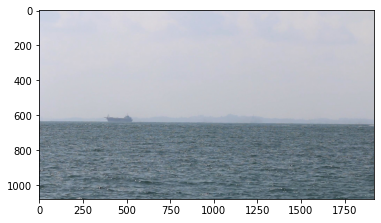

In [6]:
import matplotlib.pyplot as plt
plt.imshow(sample_images[0].cpu().permute(1, 2, 0))

-713761 642797 -1034460 687180


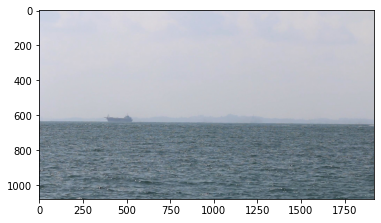

In [7]:
import cv2
import numpy as np
THRESHOLD = 0.5
image = sample_images[0].cpu().permute(1, 2, 0).numpy()
image = image.copy()

pred = model(sample_images)[0]
# pred = sample_targets[0]
for i in range(len(pred["boxes"])):
    if True:
        x, y, w, h = pred['boxes'][i]
        x, w = 1920 - int(x * 1920), 1920 - int(w * 1920)
        y, h = int(y * 1080), int(h * 1080)
        print(x, y, w, h)
        cv2.rectangle(image, (x, y), (w, h), (0, 0, 255), 2)
plt.imshow(image)

In [5]:
pred

{'boxes': tensor([[372.7508, 595.1832, 539.7816, 636.2783]], device='cuda:0',
        grad_fn=<StackBackward0>),
 'labels': tensor([3], device='cuda:0'),
 'scores': tensor([0.9995], device='cuda:0', grad_fn=<IndexBackward0>)}

In [38]:
sample_targets[0]

{'image_id': tensor([ 1.5996e+31, -1.1380e-14, -5.9066e-14,  ..., -9.3537e+28,
         -2.1317e+31, -2.3084e-15]),
 'boxes': tensor([[0.0010, 0.4704, 0.0958, 0.5111],
         [0.1880, 0.4750, 0.2167, 0.5093],
         [0.6250, 0.3843, 0.8344, 0.5593]], dtype=torch.float64),
 'labels': tensor([ 3, 10,  4])}

In [72]:
image = sample_images[0].permute(1, 2, 0).numpy()

In [64]:
sample_images[0].numpy().shape

(3, 1080, 1920)

In [8]:
sample_images, sample_targets = next(it)
sample_images = sample_images[0].to("cuda").unsqueeze(0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11 417 187 578 0.9999595880508423 3
1715 410 1913 503 0.9983084201812744 3


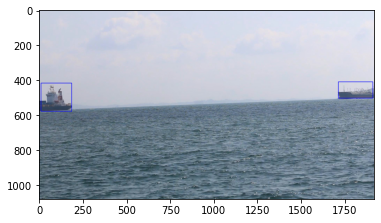

In [9]:
import cv2
import matplotlib.pyplot as plt

image = sample_images[0].cpu().permute(1, 2, 0).numpy()
image = image.copy()
# pred = sample_targets[0]
pred = model(sample_images)[0]

for i in range(len(pred["boxes"])):
    if 'scores' in pred and pred['scores'][i] > 0.5 or 'scores' not in pred:
        x, y, w, h = pred['boxes'][i]
        x, w = int(x), int(w)
        y, h = int(y), int(h)
        if 'scores' in pred:
            print(x, y, w, h, float(pred['scores'][i]), int(pred['labels'][i]))
        cv2.rectangle(image, (x, y), (w, h), (0, 0, 255), 2)
plt.imshow(image)

In [15]:
pred

{'boxes': tensor([[  11.9441,  417.6517,  187.7204,  578.2515],
         [1715.0583,  410.1200, 1913.1042,  503.7621]], device='cuda:0',
        grad_fn=<StackBackward0>),
 'labels': tensor([3, 3], device='cuda:0'),
 'scores': tensor([1.0000, 0.9983], device='cuda:0', grad_fn=<IndexBackward0>),
 'image_id': tensor([855])}

In [11]:
sample_targets[0]

{'boxes': tensor([[0.9516, 0.4667, 0.0906, 0.1463],
         [0.0570, 0.4398, 0.1078, 0.0648]]),
 'labels': tensor([3, 3]),
 'image_id': tensor([855]),
 'area': tensor([ 0.2758, -0.0190]),
 'iscrowd': tensor([0, 0])}

In [18]:
sample_images

tensor([[[[0.7647, 0.7647, 0.7647,  ..., 0.8706, 0.8706, 0.8706],
          [0.7647, 0.7647, 0.7647,  ..., 0.8706, 0.8706, 0.8706],
          [0.7647, 0.7647, 0.7647,  ..., 0.8706, 0.8706, 0.8706],
          ...,
          [0.3490, 0.3686, 0.3882,  ..., 0.3647, 0.3882, 0.4118],
          [0.2706, 0.2941, 0.3294,  ..., 0.4863, 0.4902, 0.4941],
          [0.1922, 0.2275, 0.2784,  ..., 0.4941, 0.4549, 0.4235]],

         [[0.8235, 0.8235, 0.8235,  ..., 0.8980, 0.8980, 0.8980],
          [0.8235, 0.8235, 0.8235,  ..., 0.8980, 0.8980, 0.8980],
          [0.8235, 0.8235, 0.8235,  ..., 0.8980, 0.8980, 0.8980],
          ...,
          [0.4078, 0.4275, 0.4431,  ..., 0.4392, 0.4627, 0.4863],
          [0.3294, 0.3529, 0.3843,  ..., 0.5608, 0.5647, 0.5686],
          [0.2510, 0.2863, 0.3333,  ..., 0.5686, 0.5294, 0.4980]],

         [[0.9059, 0.9059, 0.9059,  ..., 1.0000, 1.0000, 1.0000],
          [0.9059, 0.9059, 0.9059,  ..., 1.0000, 1.0000, 1.0000],
          [0.9059, 0.9059, 0.9059,  ..., 1